In [1]:
import numpy as np
def test(bool):
    if bool == True:
        return np.linspace(1,10,num=10)
    else:
        return 0.0
    
test(True)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [2]:
from scipy.integrate import solve_ivp
def linear(t,x):
    dxdt = 2
    return dxdt

x0 = [0]
sol = solve_ivp(linear, [0,10], x0, t_eval=[0,2,4,6,8])
print(sol.y)

[[ 0.  4.  8. 12. 16.]]


<h2>Wee Fortran to Python Excercise</h2>

In [3]:
class animal_class():

    def __init__(self,age=None,size=None):
        self.age = age
        self.size = size

    def print_age(self):
        print('I am', self.age,'year(s) old')

class dog_class(animal_class):
    def bark(self):
        print('("woof")')

class duck_class(animal_class):
    def quack(self):
        print('("quack")')

In [4]:
dog = dog_class(6)
duck = duck_class(2)

dog.bark()
dog.print_age()

duck.quack()
duck.print_age()

("woof")
I am 6 year(s) old
("quack")
I am 2 year(s) old


In [5]:
x = 1.25
print('Hola %i'%x)

Hola 1


<h2>Python Ray Tracer</h2>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import sys

sys.path.insert(0, '../../src/solvers-legacy/')

import full_solver as fs

import importlib
importlib.reload(fs)

dims = np.array([100, 1000, 100])
spcs = np.array([1e-4, 1e-5, 1e-4])

ne_x = np.linspace(-(dims[0] - 1) * spcs[0] / 2, (dims[0] - 1) * spcs[0] / 2, dims[0])
ne_y = np.linspace(-(dims[1] - 1) * spcs[1] / 2, (dims[1] - 1) * spcs[1] / 2, dims[1])
ne_z = np.linspace(-(dims[2] - 1) * spcs[2] / 2, (dims[2] - 1) * spcs[2] / 2, dims[2])

ne_extent = (dims[2] - 1) * spcs[2] / 2

print(np.size(ne_x))
print(ne_x[-1] - ne_x[0])

domain = fs.ScalarDomain(ne_x, ne_y, ne_z, ne_extent)
domain.test_linear_cos(s1=-1,s2=1,n_e0=1e26,Ly=5e-3)
domain.calc_dndr()

Np = 10000
beam_size = [5e-3,5e-3]
divergence = 0
beam = fs.init_beam(Np = Np, beam_size = beam_size, divergence = divergence, ne_extent = ne_extent, beam_type = 'rectangular')

rf = domain.solve(beam)

/home/administrator/Work/UROP_ICL_Internship/synthPy/evaluation/sergio_testing/../../src/solvers-legacy/full_solver.py:1: SyntaxWarning: invalid escape sequence '\l'
  """


100
0.0099
Starting ray trace.
Ray trace completed in:	 2.3239002227783203 s


VTI saved under python_cube.vti
Scalar Domain electron density succesfully saved under python_cube.pvti !


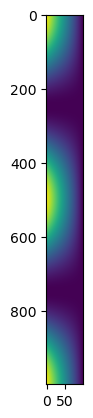

In [7]:
domain.export_scalar_field(fname='python_cube')
integrated_rnec = domain.ne.sum(axis=2)
np.save('integratedPy',integrated_rnec)
plt.imshow(integrated_rnec.T)

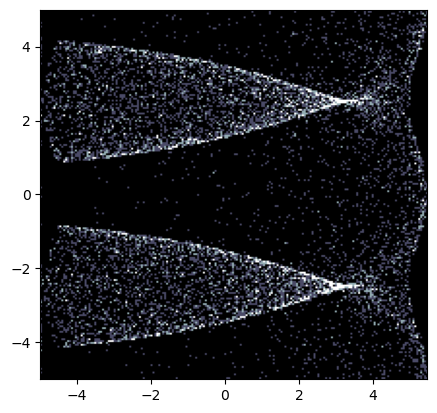

In [8]:
bins = 200
counthist,xedges,yedges = np.histogram2d(rf[0]*1e3,rf[2]*1e3,bins=bins)
#plt.scatter(rf[0]*1e3,rf[2]*1e3,s=1)
plt.imshow(counthist.T,clim=(0,3),cmap='bone',extent=(xedges[0],xedges[-1],yedges[0],yedges[-1]))
plt.show()